In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [3]:
 rand= np.array([[0.9796, np.nan,  np.nan, np.nan, np.nan],
...        [0.9647, 0.9515,    np.nan, np.nan, np.nan],
...        [0.9598, 0.9373, 0.9551,     np.nan, np.nan],
...        [0.9442, 0.9229, 0.9461, 0.9542,    np.nan],
...        [0.94  , 0.9138, 0.9458, 0.9391, 0.9552]])


In [5]:
kmeans = np.array([[0.9753,  np.nan,  np.nan, np.nan, np.nan],
...        [0.9568, 0.9546,  np.nan,  np.nan, np.nan],
...        [0.9459, 0.9268, 0.9504,    np.nan, np.nan],
...        [0.9283, 0.9169, 0.9389, 0.9463,    np.nan],
...        [0.9049, 0.8945, 0.9286, 0.9264, 0.951 ]])




In [12]:
def plot3(filename,  rand_vcl, kcen_vcl):

    fig = plt.figure(figsize=(20,10))
    ax = plt.gca()
    plt.plot(np.arange(len(rand_vcl))+1, rand_vcl, label='VCL + Random Coreset', marker='o')
    plt.plot(np.arange(len(kcen_vcl))+1, kcen_vcl, label='VCL + K-center Coreset', marker='o')
    ax.set_xticks(range(1, len(rand_vcl)+1))
    ax.set_ylabel('Average accuracy')
    ax.set_xlabel('\# tasks')
    ax.legend()
    plt.show()
    #fig.savefig(filename)
    #plt.close()


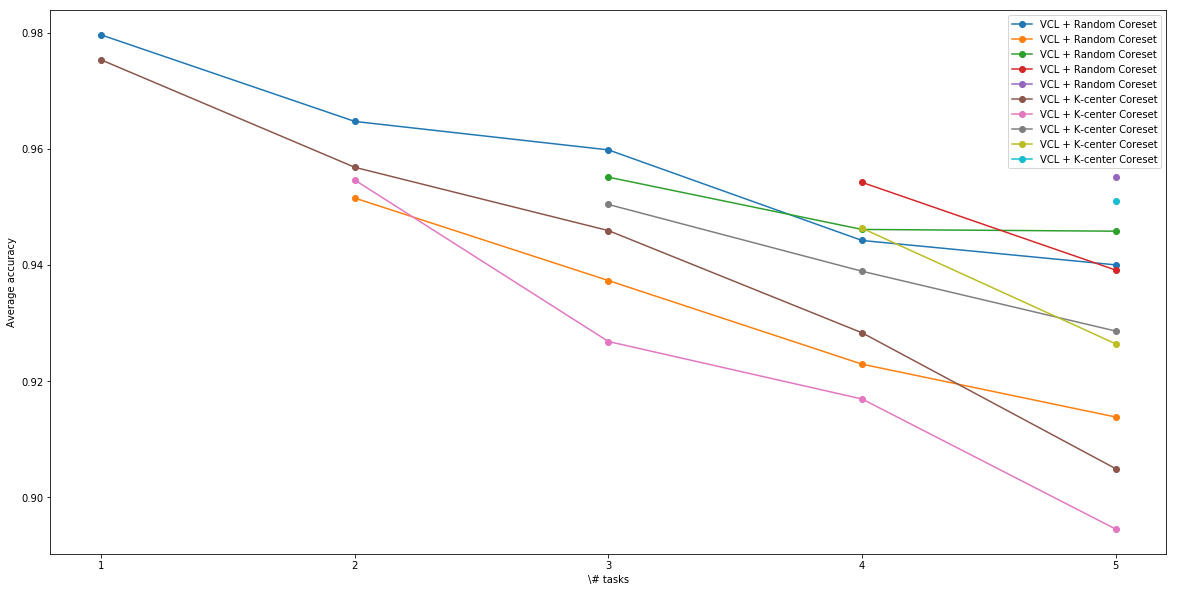

In [13]:
plot3("results.jpg", rand, kmeans)

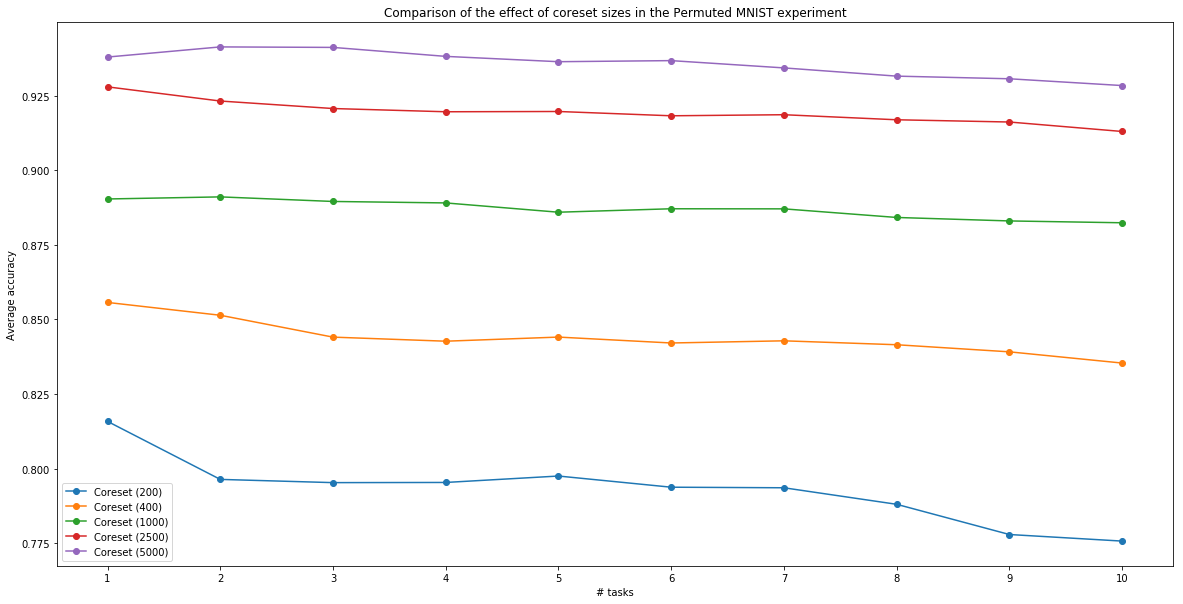

In [48]:
directory = "discriminative/results/"
import glob
directory_files = sorted(glob.glob(directory + "*.npy"))
fig = plt.figure(figsize=(20,10))
ax = plt.gca()

coreset_sizes = []
for file in directory_files:
    coreset_size = file.split("/")[-1].split("-")[-1].split(".")[0]
    coreset_sizes.append(coreset_size)

coreset_sizes = sorted(list(map(int,coreset_sizes)))

for coreset_size in coreset_sizes:
    
    file_name = "only-coreset-{}.npy".format(coreset_size)
    label = 'Coreset ({})'.format(coreset_size)
    acc_file = np.load(directory + file_name)
    acc_mean_file = np.nanmean(acc_file, 1)
    coreset_size = file.split("/")[-1].split("-")[-1].split(".")[0]   
    plt.plot(np.arange(len(acc_mean_file))+1, acc_mean_file, label=label, marker='o')
    
ax.set_xticks(range(1, len(acc_mean_file)+1))
ax.set_ylabel('Average accuracy')
ax.set_xlabel('# tasks')
ax.legend()
plt.title("Comparison of the effect of coreset sizes in the Permuted MNIST experiment")
plt.show()
